## Upper Confidence Bound (UCB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
import math
N = 10000
d = 10
number_of_selections = [0] * d
sums_of_rewards = [0] * d
ads_selected = []
total_reward = 0
for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if(number_of_selections[i]>0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

#### Histograma de resultados

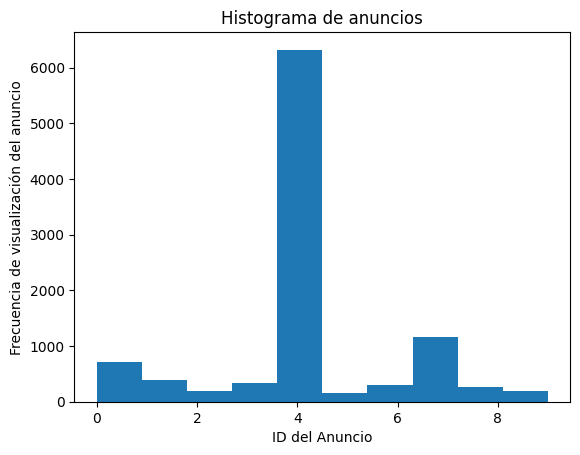

In [4]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()